In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

import string
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
import gensim as gsm



In [2]:
#!/usr/bin/env python
"""Wrapper for word2vec and emoji2vec models, so that we can query by entire phrase, rather than by
individual words.
"""

# External dependencies
import os.path
import gensim.models as gs
import numpy as np

class Word2VecCustom:
    def __init__(self, dim, w2v, e2v=None):
        self.wordVecModel = w2v
        self.emojiVecModel = e2v if e2v is not None else dict()
        self.dimension = dim

    @classmethod
    def from_word2vec_paths(cls, dim, w2v_path):
        w2v = gs.Word2Vec.load(w2v_path)
        return cls(dim, w2v)

    def __getitem__(self, item):
        tokens = item.split(' ')
        phr_sum = np.zeros(self.dimension, np.float32)

        for token in tokens:
            print(token)
            if token in self.wordVecModel.wv:  # SỬA Ở ĐÂY
                phr_sum += self.wordVecModel.wv[token]  # SỬA Ở ĐÂY
        return phr_sum
    
    def __setitem__(self, key, value):
        self.wordVecModel.wv[key] = value  # SỬA Ở ĐÂY

In [3]:
# Định nghĩa kích thước vector (thường là 300 cho Word2Vec)
vector_dim = 300

# Đường dẫn đến các mô hình
# word2vec_path = 'word2vec_dth_format.model'
word2vec_path = 'model_cbow_aug.word2vec'
emoji2vec_path = 'emoji2vec.bin'  # Nếu bạn có mô hình Emoji2Vec

phrase_vec = Word2VecCustom.from_word2vec_paths(dim=vector_dim, w2v_path=word2vec_path)


In [4]:
phrase = "giảng viên"
vector = phrase_vec[phrase]
print(vector)

giảng
viên
[-0.37799954  0.06835819 -0.5005      0.0851753  -0.11015069  0.08507548
 -0.15801091  0.06100643  0.18308695 -0.09779195 -0.07298013  0.20699643
 -0.14427955 -0.10769868 -0.40624788 -0.17740247  0.428367   -0.26064336
 -0.5355629   0.07850566  0.3890258   0.04872029 -0.03186142  0.10268936
 -0.15294114 -0.33815697  0.30793175 -0.39977935 -0.10145479  0.14189325
 -0.28254575 -0.66713834  0.5377023  -0.23117687  0.26799133 -0.08450256
 -0.3242929  -0.18052472  0.2397765   0.19536123  0.45671418  0.24614656
 -0.25995293 -0.03250885  0.33179483  0.37172252 -0.12236728  0.09007429
  0.84960717 -0.55206186  0.310409   -0.58546686  0.136658    0.32108846
 -0.64008045  0.0442884  -0.29986098 -0.3939107   0.5447394   0.19712253
  0.28661937  0.54719186  0.42002827 -0.09327313  0.40473416  0.08647774
 -0.09248106  0.10758781 -0.12069082  0.14440402 -0.27159053  0.07054336
  0.2488108  -0.1740317   0.6774342  -0.5929663   0.04052313 -0.08289678
 -0.31414095 -0.47991005 -0.5063839   0.

In [5]:
train = pd.read_csv("train_aug_merge_uit_vsfc.csv")
test = pd.read_csv("test_aug_merge_uit_vsfc.csv")
val = pd.read_csv("dev_aug_merge_uit_vsfc.csv")

In [6]:
#Show dataset
train.head()

text  label
0           phòng thực hành có quá nhiều máy bị hỏng      0
1  cần biết rõ hơn nữa về cách thức vận dụng vào ...      0
2               có lúc làm bài sai nói làm hơi tự ái      0
3  có những cái dạy lan man ngoài phần thi không ...      0
4  dạy dễ hiểu tận tình đảm bảo giờ lên lớp cung ...      2

In [7]:
#Show dataset
test.head()

text  label
0                          rất dễ thương dạy dễ hiểu      2
1                 quá nhiều nội dung không cần thiết      0
2  giảng lý thuyết kỹ trước làm thực hành đánh gi...      2
3  Nếu thầy dạy thỉnh thoảng bù lịch học thì em k...      1
4  môn học cần có một giáo án rõ ràng hoặc một tà...      0

In [8]:
#Show dataset
val.head()

text  label
0           quá chú trọng vào việc luyện kỹ năng thi      0
1                          rất nhiệt tình thân thiện      2
2  các môn học cần có ứng dụng thực tiễn hơn hiện...      0
3                       thân thiện cởi mở nhiệt tình      2
4      Thầy quá kiệt sức nên làm cho em thấy sợ hãi.      1

In [9]:
label_name = ['Tiêu cực', 'Trung Lập', 'Tích Cực']

In [10]:
def encode_phrase2vec(text, model):
    return model[text]

In [11]:
train_val =  pd.concat([train, val])

In [12]:
train_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in train['text']]
test_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in test['text']]
val_data_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in val['text']]
train_val_text_phrase_vec = [encode_phrase2vec(text, phrase_vec) for text in train_val['text']]

phòng
thực
hành
có
quá
nhiều
máy
bị
hỏng
cần
biết
rõ
hơn
nữa
về
cách
thức
vận
dụng
vào
trong
từng
bài
tập
có
lúc
làm
bài
sai
nói
làm
hơi
tự
ái
có
những
cái
dạy
lan
man
ngoài
phần
thi
không
cần
thiết
dạy
dễ
hiểu
tận
tình
đảm
bảo
giờ
lên
lớp
cung
cấp
đầy
đủ
kiến
thức
cần
có
nhằm
giảm
thời
lượng
giảng
dạy
cũng
sự
thú
vị
học
môn
toán
Đó
là
một
động
lực
quan
trọng
giúp
nhóm
chúng
tôi
hoàn
thành
tất
cả
bài
tập
của
thầy.
giải
đáp
thắc
mắc
dạy
rất
tốt
đã
không
đảm
bảo
giờ
lên
lớp
ra
bài
thi
đề
cương
ôn
tập
nên
chú
ý
đến
việc
rõ
ràng
hướng
dẫn
rõ
biết
phải
học
gì
theo
ý
kiến
đầu
ra
tốt
nghiệp
bằng
cấp
theo
các
chương
trình
ngoại
ngữ
bằng
cấp
hay
nghĩ
nên
phần
tự
lo
học
tiếng
anh
tiếng
anh
tiếng
anh
phải
học
thêm
mấy
cái
mất
một
khoảng
thời
gian
nên
đảm
bảo
giờ
trên
lớp
sử
dụng
hiệu
quả
tiết
học
Đảm
bảo
môi
trường
học
tập
phù
hợp
với
nhu
cầu
cần
tỉnh
táo.
quá
chu
đáo
nên
hay
đi
lòng
vòng
vấn
đề
thường
xuyên
đi
trễ
vào
những
buổi
gần
cuối
cần
phương
pháp
học
môn
này
thường
xuyên
nghĩ
phải
đi
học


In [13]:
train_data_text_phrase_vec = np.array(train_data_text_phrase_vec)
test_data_text_phrase_vec = np.array(test_data_text_phrase_vec)
val_data_text_phrase_vec = np.array(val_data_text_phrase_vec)
train_val_text_phrase_vec = np.array(train_val_text_phrase_vec)
print(train_val_text_phrase_vec.shape)

(16137, 300)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_val_text_tfidf = tfidf.fit_transform(train_val['text'])
# train_data_text_tfidf = tfidf.fit_transform(train['sents'])
test_data_text_tfidf = tfidf.transform(test['text'])
val_data_text_tfidf = tfidf.transform(val['text'])

In [15]:
print(val_data_text_tfidf)

  (0, 175)	0.4163924735038681
  (0, 778)	0.3001074425334172
  (0, 810)	0.4089563746321628
  (0, 1194)	0.2987053621317738
  (0, 1300)	0.26577286066677
  (0, 1472)	0.3233834539538995
  (0, 1672)	0.35939773669527875
  (0, 1817)	0.28122917750262255
  (0, 1831)	0.3108278720581273
  (1, 1103)	0.334292777783881
  (1, 1350)	0.3449855158805678
  (1, 1479)	0.5639985320110363
  (1, 1510)	0.5921087376735901
  (1, 1717)	0.31709025720469425
  (2, 266)	0.14241807753539726
  (2, 277)	0.10850552444678137
  (2, 289)	0.17699271653372647
  (2, 309)	0.1465095178671619
  (2, 428)	0.16759802412073146
  (2, 507)	0.21397012565876464
  (2, 508)	0.1787623920190694
  (2, 557)	0.19481167667510987
  (2, 608)	0.13992427636426363
  (2, 637)	0.19907938172403386
  (2, 658)	0.21114385860757012
  :	:
  (1611, 1472)	0.4232354935342856
  (1611, 1579)	0.15823975062966888
  (1611, 1634)	0.19989211328978848
  (1611, 1966)	0.21966787799563664
  (1611, 2103)	0.22608929100393732
  (1611, 2107)	0.2400893549188185
  (1612, 44)	0.1

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
countVector = CountVectorizer(ngram_range=(2,2))
train_val_text_count_vector = countVector.fit_transform(train_val['text'])
# train_data_text_count_vector = countVector.fit_transform(train['sents'])
test_data_text_count_vector = countVector.transform(test['text'])
val_data_text_count_vector = countVector.transform(val['text'])

In [17]:
print(val_data_text_count_vector)

  (0, 2512)	1
  (0, 13874)	1
  (0, 14297)	1
  (0, 21236)	1
  (0, 22502)	1
  (0, 29228)	1
  (0, 32042)	1
  (0, 32627)	1
  (1, 19167)	1
  (1, 23301)	1
  (1, 25871)	1
  (1, 29874)	1
  (2, 3707)	1
  (2, 4655)	1
  (2, 4947)	1
  (2, 5382)	1
  (2, 7528)	1
  (2, 8941)	1
  (2, 9003)	1
  (2, 10033)	1
  (2, 10848)	1
  (2, 11402)	1
  (2, 11579)	1
  (2, 12114)	1
  (2, 12880)	1
  :	:
  (1611, 24981)	1
  (1611, 25102)	1
  (1611, 25190)	1
  (1611, 27349)	1
  (1611, 28545)	1
  (1611, 34118)	1
  (1611, 36808)	1
  (1611, 36882)	1
  (1612, 701)	1
  (1612, 3766)	1
  (1612, 5223)	1
  (1612, 6318)	1
  (1612, 10291)	1
  (1612, 13617)	1
  (1612, 14024)	1
  (1612, 21443)	1
  (1612, 23398)	1
  (1612, 27457)	1
  (1612, 29410)	1
  (1612, 29475)	1
  (1612, 30783)	1
  (1612, 33085)	1
  (1612, 36030)	1
  (1612, 37322)	1
  (1613, 25878)	1


In [18]:
# train_data = {
#     'phrase_features': train_data_text_phrase_vec,
#     'tfidf_features': train_data_text_tfidf,
#     'bi_gram_features': train_data_text_count_vector,
#
# }
test_data = {
    'phrase_features': test_data_text_phrase_vec,
    'tfidf_features': test_data_text_tfidf,
    'bi_gram_features': test_data_text_count_vector,
 
}
val_data = {
    'phrase_features': val_data_text_phrase_vec,
    'tfidf_features': val_data_text_tfidf,
    'bi_gram_features': val_data_text_count_vector,

}
train_val_data = {
    'phrase_features': train_val_text_phrase_vec,
    'tfidf_features': train_val_text_tfidf,
    'bi_gram_features': train_val_text_count_vector,
}

In [19]:
import numpy as np
from sklearn.decomposition import PCA

# train_phrase_dense = train_data['phrase_features']  # đã ở dạng numpy
# train_tfid_dense   = train_data['tfidf_features'].toarray()  # từ csr_matrix -> numpy
# train_bi_gram_dense= train_data['bi_gram_features'].toarray()  # từ csr_matrix -> numpy
#
# X_train_concat = np.concatenate([
#     train_phrase_dense,
#     train_tfid_dense,
#     train_bi_gram_dense,
# ], axis=1)
# print("X_train_concat shape:", X_train_concat.shape)
# pca = PCA(n_components=1024)
# X_train_dense = pca.fit_transform(X_train_concat)
# print("X_train_dense shape sau PCA:", X_train_dense.shape)


train_val_phrase_dense = train_val_data['phrase_features']
train_val_tfid_dense = train_val_data['tfidf_features'].toarray()
train_val_bi_gram_dense = train_val_data['bi_gram_features'].toarray()

X_train_val_concat = np.concatenate([
    train_val_phrase_dense,
    train_val_tfid_dense,
    train_val_bi_gram_dense,
], axis=1)
print("X_train_val_concat shape:", X_train_val_concat.shape)
pca = PCA(n_components=1024)
X_train_val_dense = pca.fit_transform(X_train_val_concat)
print("X_train_val_dense shape sau PCA:", X_train_val_dense.shape)

test_phrase_dense = test_data['phrase_features']
test_tfid_dense   = test_data['tfidf_features'].toarray()
test_bi_gram_dense= test_data['bi_gram_features'].toarray()

X_test_concat = np.concatenate([
    test_phrase_dense,
    test_tfid_dense,
    test_bi_gram_dense,
], axis=1)
print("X_test_concat shape:", X_test_concat.shape)

# Áp dụng transform với PCA đã fit từ train
X_test_dense = pca.transform(X_test_concat)
print("X_test_dense shape sau PCA:", X_test_dense.shape)

# =========================
# 4) GHÉP & CHUYỂN VAL THÀNH DENSE
# =========================
val_phrase_dense = val_data['phrase_features']
val_tfid_dense   = val_data['tfidf_features'].toarray()
val_bi_gram_dense= val_data['bi_gram_features'].toarray()

X_val_concat = np.concatenate([
    val_phrase_dense,
    val_tfid_dense,
    val_bi_gram_dense,
], axis=1)
print("X_val_concat shape:", X_val_concat.shape)

X_val_dense = pca.transform(X_val_concat)
print("X_val_dense shape sau PCA:", X_val_dense.shape)


X_train_val_concat shape: (16137, 40041)
X_train_val_dense shape sau PCA: (16137, 1024)
X_test_concat shape: (4035, 40041)
X_test_dense shape sau PCA: (4035, 1024)
X_val_concat shape: (1614, 40041)
X_val_dense shape sau PCA: (1614, 1024)


In [20]:
# y_train = train['sentiments'].tolist()
y_test = test['label'].tolist()
y_val = val['label'].tolist()
y_train_val = train_val['label'].tolist()

In [21]:
print(len(y_train_val))

16137


In [22]:
from sklearn.ensemble import RandomForestClassifier
import math
RF = RandomForestClassifier()
RF.fit(X_train_val_dense, y_train_val)
y_pred_RF_phrase= RF.predict(X_test_dense)
print(f'Accuracy on test set: {RF.score(X_test_dense, y_test)}')

Accuracy on test set: 0.78636926889715


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

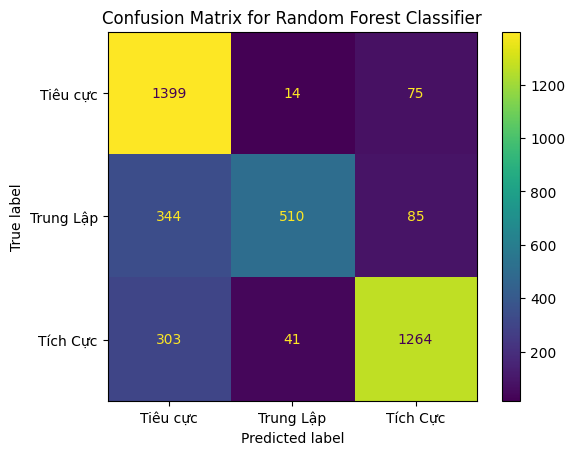

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_RF_phrase, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title("Confusion Matrix for Random Forest Classifier")

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF_phrase, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.68      0.94      0.79      1488
   Trung Lập       0.90      0.54      0.68       939
    Tích Cực       0.89      0.79      0.83      1608

    accuracy                           0.79      4035
   macro avg       0.82      0.76      0.77      4035
weighted avg       0.82      0.79      0.78      4035



In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_jobs=-1)
KNC.fit(X_train_val_dense, y_train_val)
y_pred_KNN = KNC.predict(X_test_dense)
print(f'Accuracy on test set: {KNC.score(X_test_dense, y_test)}')


Accuracy on test set: 0.7814126394052044


Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbors Classifier')

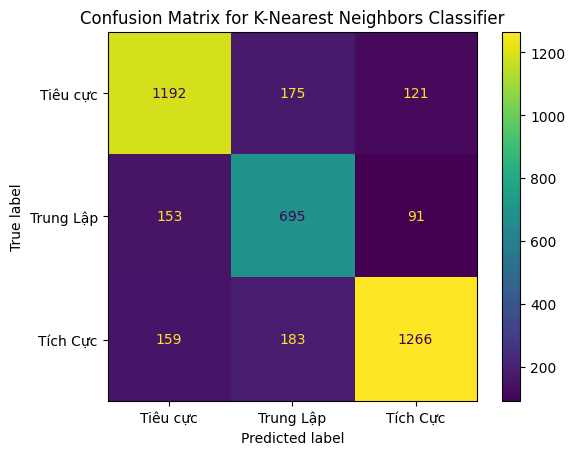

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_KNN, labels=KNC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.79      0.80      0.80      1488
   Trung Lập       0.66      0.74      0.70       939
    Tích Cực       0.86      0.79      0.82      1608

    accuracy                           0.78      4035
   macro avg       0.77      0.78      0.77      4035
weighted avg       0.79      0.78      0.78      4035



In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
GNB = GaussianNB(var_smoothing=1e-7)
GNB.fit(X_train_val_dense, y_train_val)
y_pred_GNB = GNB.predict(X_test_dense)
print(f'Accuracy on test set: {GNB.score(X_test_dense, y_test)}')


Accuracy on test set: 0.49318463444857497


Text(0.5, 1.0, 'Confusion Matrix for Gaussian Naive Bayes')

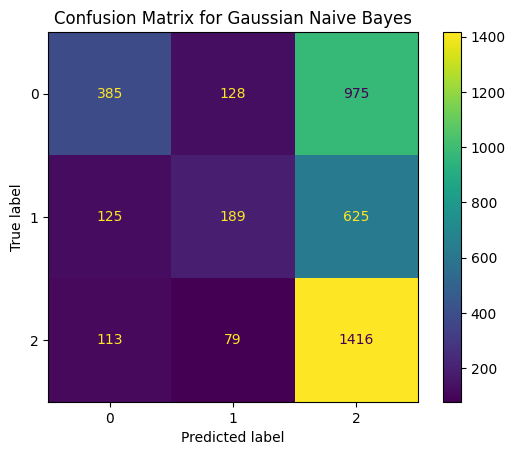

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_GNB, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Gaussian Naive Bayes')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GNB, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.62      0.26      0.36      1488
   Trung Lập       0.48      0.20      0.28       939
    Tích Cực       0.47      0.88      0.61      1608

    accuracy                           0.49      4035
   macro avg       0.52      0.45      0.42      4035
weighted avg       0.53      0.49      0.44      4035



Accuracy on test set: 0.7197026022304833
              precision    recall  f1-score   support

    Tiêu cực       0.67      0.81      0.73      1488
   Trung Lập       0.67      0.62      0.65       939
    Tích Cực       0.81      0.69      0.75      1608

    accuracy                           0.72      4035
   macro avg       0.72      0.71      0.71      4035
weighted avg       0.73      0.72      0.72      4035



Text(0.5, 1.0, 'Confusion Matrix for Bernouli Naive Bayes')

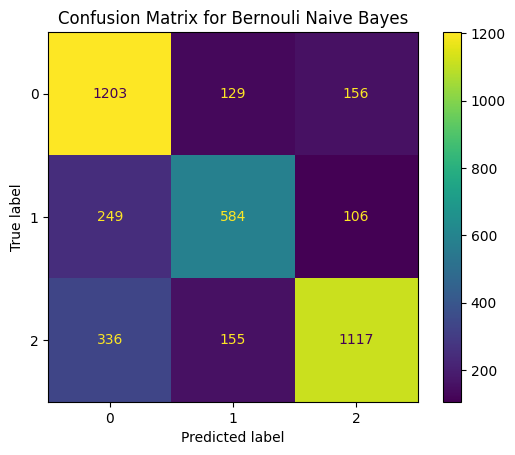

In [31]:
from sklearn.naive_bayes import  BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train_val_dense, y_train_val)
y_pred_BNB = BNB.predict(X_test_dense)
print(f'Accuracy on test set: {BNB.score(X_test_dense, y_test)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_BNB, target_names=label_name))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_BNB, labels=BNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=BNB.classes_)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Bernouli Naive Bayes')

In [32]:
!pip install xgboost

In [33]:
from sklearn.svm import SVC
# Khởi tạo mô hình với các tham số cụ thể
svc = SVC(
    class_weight='balanced',
)

# Huấn luyện mô hình
svc.fit(X_train_val_dense, y_train_val)

# Dự đoán và đánh giá
y_pred_SVC = svc.predict(X_test_dense)
accuracy = svc.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')


Accuracy on test set: 0.83


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_SVC, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.85      0.85      0.85      1488
   Trung Lập       0.70      0.83      0.76       939
    Tích Cực       0.91      0.80      0.85      1608

    accuracy                           0.83      4035
   macro avg       0.82      0.83      0.82      4035
weighted avg       0.84      0.83      0.83      4035



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

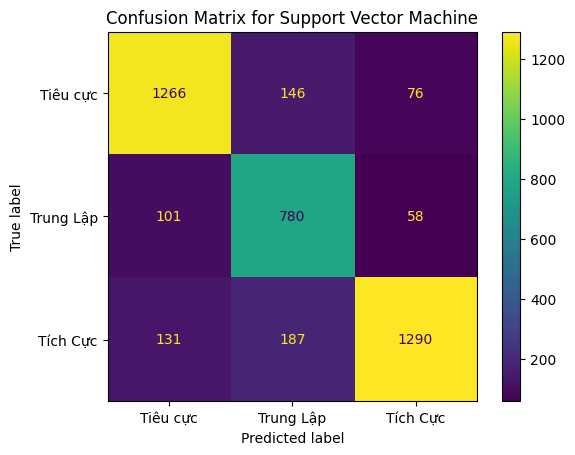

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_SVC, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Support Vector Machine')

In [36]:
from sklearn.linear_model import SGDClassifier
sgdClassifier = SGDClassifier(max_iter=10000, tol=1e-6)
sgdClassifier.fit(X_train_val_dense, y_train_val)

y_pred_sgd = sgdClassifier.predict(X_test_dense)
accuracy = sgdClassifier.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy:.2f}')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd, target_names=label_name))

Accuracy on test set: 0.88
              precision    recall  f1-score   support

    Tiêu cực       0.87      0.89      0.88      1488
   Trung Lập       0.86      0.83      0.84       939
    Tích Cực       0.89      0.89      0.89      1608

    accuracy                           0.88      4035
   macro avg       0.87      0.87      0.87      4035
weighted avg       0.88      0.88      0.88      4035



Text(0.5, 1.0, 'Confusion Matrix for Linear Support Vector Machine')

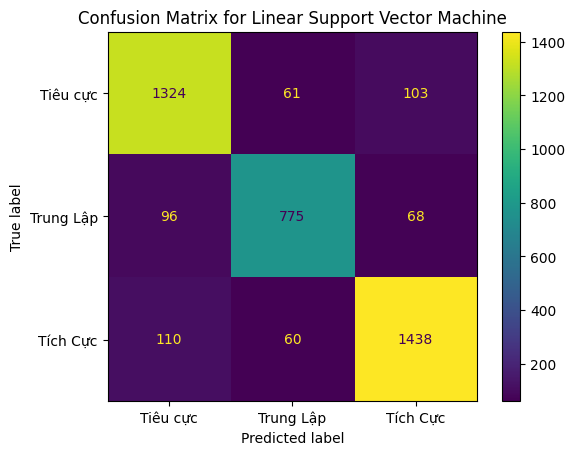

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_sgd, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Linear Support Vector Machine')

In [38]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
print(len(y_train_val))

logistic_regression = LogisticRegression(
    max_iter=100000,
    tol=1e-7,
    random_state=2004,
    warm_start=True
)

# Huấn luyện mô hình
logistic_regression.fit(X_train_val_dense, y_train_val)

# Dự đoán
y_pred_logistic_regression = logistic_regression.predict(X_test_dense)

# Đánh giá mô hình
accuracy = logistic_regression.score(X_test_dense, y_test)
print(f'Accuracy on test set: {accuracy}')


16137
Accuracy on test set: 0.8897149938042132


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

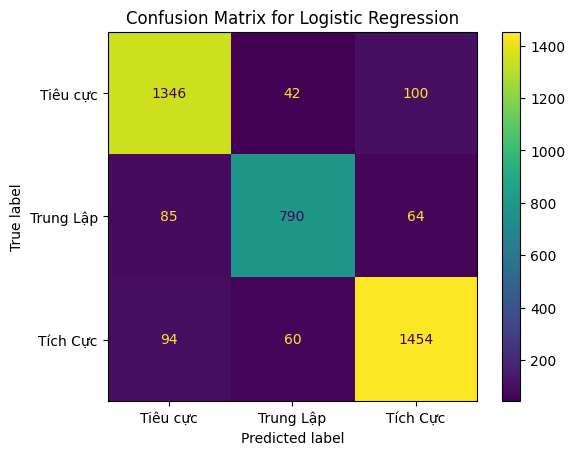

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_logistic_regression, labels=logistic_regression.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Logistic Regression')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.88      0.90      0.89      1488
   Trung Lập       0.89      0.84      0.86       939
    Tích Cực       0.90      0.90      0.90      1608

    accuracy                           0.89      4035
   macro avg       0.89      0.88      0.89      4035
weighted avg       0.89      0.89      0.89      4035



              precision    recall  f1-score   support

    Tiêu cực       0.88      0.90      0.89      1488
   Trung Lập       0.89      0.84      0.86       939
    Tích Cực       0.90      0.90      0.90      1608

    accuracy                           0.89      4035
   macro avg       0.89      0.88      0.89      4035
weighted avg       0.89      0.89      0.89      4035



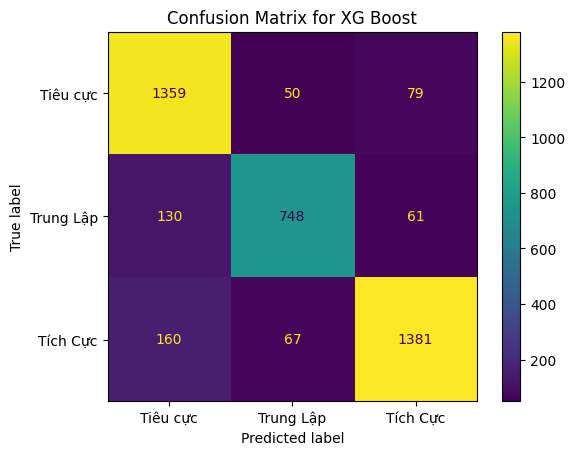

In [41]:
from xgboost import XGBClassifier

# XGB cho bài toán phân loại
xgb = XGBClassifier()
xgb.fit(X_train_val_dense, y_train_val)
y_pred_xgb = xgb.predict(X_test_dense)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for XG Boost')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))

              precision    recall  f1-score   support

    Tiêu cực       0.88      0.90      0.89      1488
   Trung Lập       0.89      0.84      0.86       939
    Tích Cực       0.90      0.90      0.90      1608

    accuracy                           0.89      4035
   macro avg       0.89      0.88      0.89      4035
weighted avg       0.89      0.89      0.89      4035



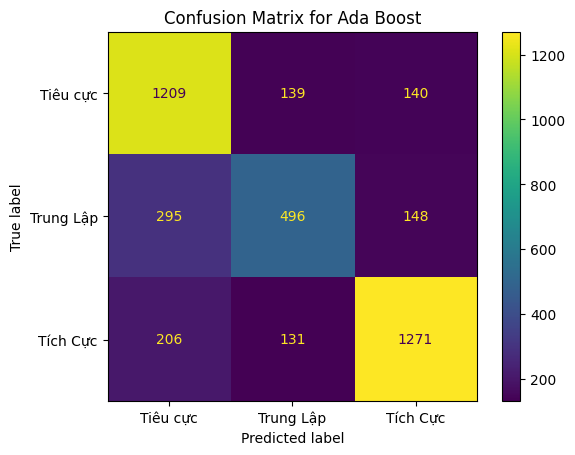

In [42]:
from sklearn.ensemble import AdaBoostClassifier
# XGB cho bài toán phân loại
ada = AdaBoostClassifier()
ada.fit(X_train_val_dense, y_train_val)
y_pred_ada = ada.predict(X_test_dense)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_ada, labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_name)
disp.plot()
plt.gca().grid(False)
plt.title('Confusion Matrix for Ada Boost')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic_regression, target_names=label_name))